# *****HOUSE PRICE PRIDICTION USING REGRESSION ALGORITHM*****

## IMPORT LIBRARIES

In [1]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import os

## IMPORTING DATA

In [2]:
#load the data
df=pd.read_csv("MagicBricks.csv")

## EXPLORATORY DATA ANALYSIS

In [3]:
#Explore the data
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [5]:
df.shape

(1259, 11)

# DATA PRE-PROCESSING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [7]:
#checking for null
df.isna().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [8]:
df.Bathroom.unique()

array([ 2.,  3.,  4.,  1., nan,  5.,  6.,  7.])

In [9]:
df.Furnishing.unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished', nan], dtype=object)

In [10]:
df.Transaction.unique()

array(['New_Property', 'Resale'], dtype=object)

In [11]:
df.Locality.unique()

array(['Rohini Sector 25', 'J R Designers Floors, Rohini Sector 24',
       'Citizen Apartment, Rohini Sector 13', 'Rohini Sector 24',
       'Rohini Sector 24 carpet area 650 sqft status Ready to Move floor 4 out of 4 floors transaction New Property furnishing Semi-Furnished facing East overlooking Garden/Park, Main Road car parking 1 Open bathroom 2 balcony 1 ownership Freehold Newly Constructed Property Newly Constructed Property East Facing Property 2BHK Newly build property for Sale. A House is waiting for a Friendly Family to make it a lovely home.So please come and make his house feel alive once again. read more Contact Agent View Phone No. Share Feedback Garima properties Certified Agent Trusted by Users Genuine Listings Market Knowledge',
       'Delhi Homes, Rohini Sector 24', 'Rohini Sector 21',
       'Rohini Sector 22', 'Rohini Sector 20',
       'Rohini Sector 8 How Auctions work? The borrower has the physical possession of the Property. However the lender (Bank) can lega

In [12]:
df1 = df.drop(['Furnishing','Transaction','Type','Status'], axis = 'columns')


In [13]:
df1

,Area,BHK,Bathroom,Locality,Parking,Price,Per_Sqft
0,800.0,3,2.0,Rohini Sector 25,1.0,6500000,NaN
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,6667.0
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,6667.0
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000,6667.0
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,6667.0
...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Chittaranjan Park,3.0,55000000,12916.0
1255,1050.0,3,2.0,Chittaranjan Park,3.0,12500000,12916.0
1256,875.0,3,3.0,Chittaranjan Park,3.0,17500000,12916.0
1257,990.0,2,2.0,Chittaranjan Park Block A,1.0,11500000,12916.0


In [14]:
len(df1)


1259

In [15]:
df1.isnull().sum()


Area          0
BHK           0
Bathroom      2
Locality      0
Parking      33
Price         0
Per_Sqft    241
dtype: int64

In [16]:
df2 = df1.dropna()


In [17]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 1 to 1258
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      1005 non-null   float64
 1   BHK       1005 non-null   int64  
 2   Bathroom  1005 non-null   float64
 3   Locality  1005 non-null   object 
 4   Parking   1005 non-null   float64
 5   Price     1005 non-null   int64  
 6   Per_Sqft  1005 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 62.8+ KB


In [18]:
df2.head()


,Area,BHK,Bathroom,Locality,Parking,Price,Per_Sqft
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,6667.0
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,6667.0
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000,6667.0
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,6667.0
5,1300.0,4,3.0,Rohini Sector 24,1.0,15500000,6667.0


In [19]:
df3 = df2[~(df2.Bathroom >4)]


In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 1 to 1258
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      944 non-null    float64
 1   BHK       944 non-null    int64  
 2   Bathroom  944 non-null    float64
 3   Locality  944 non-null    object 
 4   Parking   944 non-null    float64
 5   Price     944 non-null    int64  
 6   Per_Sqft  944 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 59.0+ KB


In [21]:
round(df3.Area)


1         750.0
2         950.0
3         600.0
4         650.0
5        1300.0
         ...   
1253     1200.0
1255     1050.0
1256      875.0
1257      990.0
1258    11050.0
Name: Area, Length: 944, dtype: float64

In [22]:
df3.head()


,Area,BHK,Bathroom,Locality,Parking,Price,Per_Sqft
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,6667.0
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,6667.0
3,600.0,2,2.0,Rohini Sector 24,1.0,4200000,6667.0
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,6667.0
5,1300.0,4,3.0,Rohini Sector 24,1.0,15500000,6667.0


In [23]:
df3[df3.BHK < df3.Bathroom]


,Area,BHK,Bathroom,Locality,Parking,Price,Per_Sqft
74,1850.0,3,4.0,Dwarka,1.0,24000000,3524.0
136,1100.0,2,3.0,Lajpat Nagar 2,1.0,22500000,7000.0
162,729.0,3,4.0,Budh Vihar,1.0,2600000,3567.0
166,405.0,2,3.0,Budh Vihar Phase 2,1.0,6200000,2500.0
167,666.0,1,2.0,Budh Vihar Phase 1,1.0,3500000,5255.0
249,4800.0,3,4.0,"Maharani Bagh, New Friends Colony",1.0,85000000,15459.0
341,70.0,1,2.0,"Yamuna Vihar, Shahdara",1.0,4500000,5357.0
373,387.0,1,2.0,"Guru Angad Nagar West, Laxmi Nagar",2.0,1700000,32000.0
421,70.0,2,3.0,"Patel Nagar South, Patel Nagar",1.0,8200000,23840.0
439,850.0,2,3.0,Patel Nagar West,1.0,5900000,24718.0


In [24]:
df4 = df3[~(df3.Parking >4)]


In [25]:
df4.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 1 to 1258
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      929 non-null    float64
 1   BHK       929 non-null    int64  
 2   Bathroom  929 non-null    float64
 3   Locality  929 non-null    object 
 4   Parking   929 non-null    float64
 5   Price     929 non-null    int64  
 6   Per_Sqft  929 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 58.1+ KB


In [26]:
df4['BHK'] = df4['BHK'].astype(float)
df4['Price'] = df4['Price'].astype(float)

<ipython-input-26-be8589782f9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['BHK'] = df4['BHK'].astype(float)
<ipython-input-26-be8589782f9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Price'] = df4['Price'].astype(float)


In [27]:
df4.dtypes


Area        float64
BHK         float64
Bathroom    float64
Locality     object
Parking     float64
Price       float64
Per_Sqft    float64
dtype: object

In [28]:
df4.to_csv('df4.csv')


In [29]:
dummies = pd.get_dummies(df4.Locality,dtype=float)


In [30]:
dummies

,"APL Builder Floor, Greater Kailash 1","Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla","Adarsh Homes, Dwarka Mor","Ahinsha Vatika, Ram Nagar, Shahdara",Alaknanda,"Amar Colony, Lajpat Nagar","Andheria Mor, Mehrauli","Anekant Apartment, Vasundhara Enclave",...,Vasundhara Enclave,"Vijay Enclave, Mahavir Enclave","Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Virat Residency, Dwarka Mor","Vishwas Nagar, Shahdara","Yamuna Apartment, Alaknanda","Yamuna Vihar, Shahdara","Zakir Nagar, New Friends Colony","mind. The space is airy, is well located and can be easily customized as per the needs. Prime facilities are easily accessible from this place with Government Girls Senior Secondary School No 2 (0 km ). Other key neighbourhood are B Block Market (0 km ). read more Contact Owner View Phone No. Share Feedback Owner vinod kumar"
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df5 = df4.drop('Locality',axis = 'columns')



In [32]:
df5

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
1,750.0,2.0,2.0,1.0,5000000.0,6667.0
2,950.0,2.0,2.0,1.0,15500000.0,6667.0
3,600.0,2.0,2.0,1.0,4200000.0,6667.0
4,650.0,2.0,2.0,1.0,6200000.0,6667.0
5,1300.0,4.0,3.0,1.0,15500000.0,6667.0
...,...,...,...,...,...,...
1253,1200.0,3.0,3.0,1.0,16500000.0,12916.0
1255,1050.0,3.0,2.0,3.0,12500000.0,12916.0
1256,875.0,3.0,3.0,3.0,17500000.0,12916.0
1257,990.0,2.0,2.0,1.0,11500000.0,12916.0


In [33]:
x= df5.drop('Price',axis = 'columns')


In [34]:
y = df5.Price


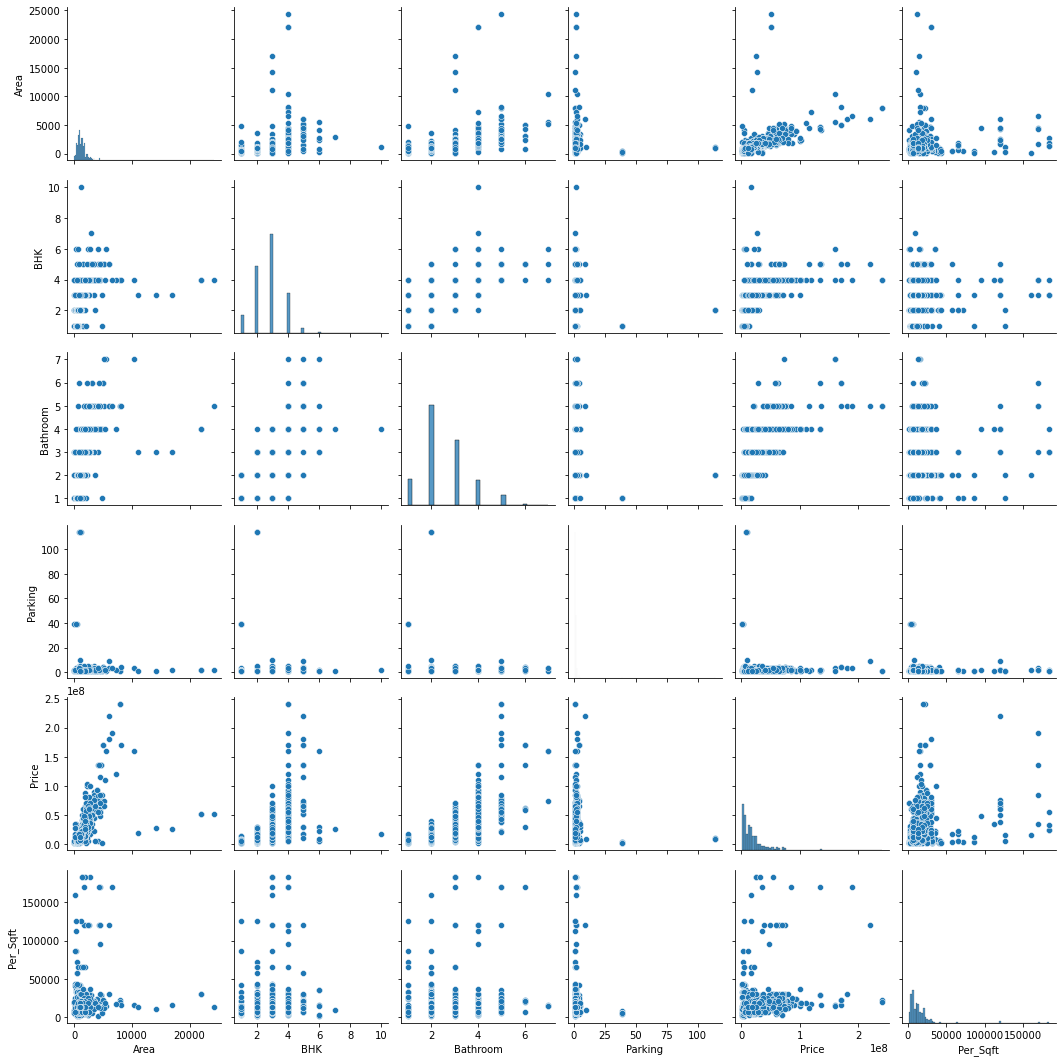

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

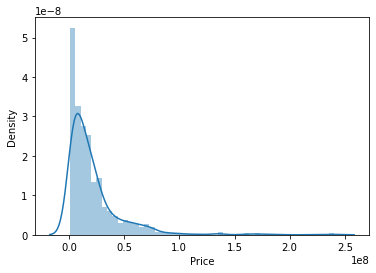

In [36]:
sns.distplot(df['Price'])

<AxesSubplot:>

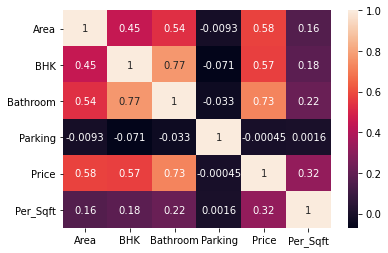

In [37]:
sns.heatmap(df.corr(),annot=True)

## TRAINING A LINEAR REGRESSION MODEL

In [38]:
from sklearn.model_selection import train_test_split


In [39]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size= 0.4, random_state =101)


In [40]:
from sklearn.linear_model import LinearRegression


In [41]:
model = LinearRegression()


In [42]:
x_train = x_train.fillna(x_train.mean())
y_train= y_train.fillna(y_train.mean())
x_test= x_test.fillna(x_train.mean())
y_test = y_test.fillna(y_train.mean())
x = x.fillna(x.mean())
y = y.fillna(y.mean())

In [43]:
model.fit(x_train,y_train)

LinearRegression()

In [44]:
model.score(x_test,y_test)


0.5646791040226076

In [45]:
print(model.intercept_)



-22375405.596930865


In [46]:
predictions=model.predict(x_test)

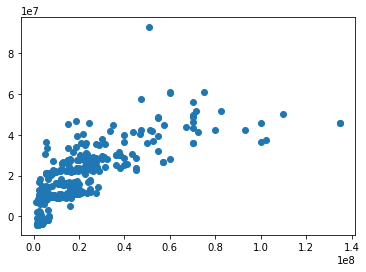

In [47]:
plt.scatter(y_test,predictions)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


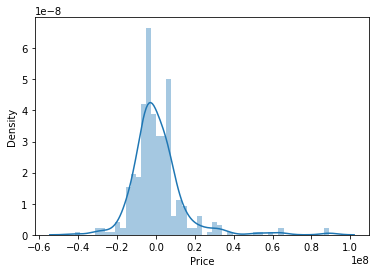

In [48]:
sns.distplot((y_test-predictions),bins=50);